# 📍  O que é o Seaborn

O Seaborn é uma biblioteca Python para visualização de dados com foco em gráficos estatísticos bonitos e fáceis de criar.

* Complementa o Matplotlib — não o substitui, mas oferece sintaxe mais simples e estilo pronto.
* Baseado no Matplotlib → mantém a flexibilidade e controle quando necessário.
* Integração nativa com pandas.DataFrame → ideal para dados tabulares.
* Foco em estatística → gráficos de distribuição, relações, categóricos, matrizes de correlação, etc.


#### Seaborn versus Matplotlib

* Uma das principais diferenças entre Matplotlib e Seaborn é o foco. **Matplotlib** é uma biblioteca de plotagem de **baixo nível** que oferece uma ampla gama de ferramentas para a criação de visualizações altamente personalizáveis. É uma biblioteca altamente flexível, permitindo que os usuários criem praticamente qualquer tipo de plotagem que possam imaginar. Essa flexibilidade tem o custo de uma curva de aprendizado mais acentuada e um código mais verboso.

* O **Seaborn**, por outro lado, é uma interface de **alto nível** para a criação de gráficos estatísticos. Ele é construído sobre o Matplotlib e oferece uma interface mais simples e intuitiva para a criação de gráficos estatísticos comuns. O Seaborn foi projetado para funcionar com dataframes Pandas, facilitando a criação de visualizações com código mínimo. Ele também oferece uma variedade de funções estatísticas integradas, permitindo que os usuários realizem facilmente análises estatísticas complexas com suas visualizações.

# 🔗  Instalação e Importação

No Google Colab o Seaborn já vem instalado por padrão, então na maioria dos casos você não precisa instalar manualmente — basta importar e usar.

In [ ]:
import seaborn as sns

Para usar seaborn e a visualização de dados iremos também utilizar as outras bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

 Se por algum motivo quiser atualizar para a versão mais recente no Colab, pode rodar:

In [ ]:
print(sns.__version__)

0.13.2


> Aqui você tem acesso a documentação da bibloteca: https://seaborn.pydata.org/

# 💡 Configuração Inicial

O Seaborn já vem com temas prontos. Você pode definir um estilo global para os gráficos:

In [ ]:
sns.set_theme(style="darkgrid")  # Opções: whitegrid, darkgrid, white, dark, ticks

Vamos ver como esses templates se comportam

In [ ]:
# Dados
x = [10, 15, 20, 25, 30, 35, 40]
y = [20, 24, 28, 32, 36, 40, 44]
df = pd.DataFrame({'X': x, 'Y': y})

In [ ]:
df

,X,Y
0,10,20
1,15,24
2,20,28
3,25,32
4,30,36
5,35,40
6,40,44


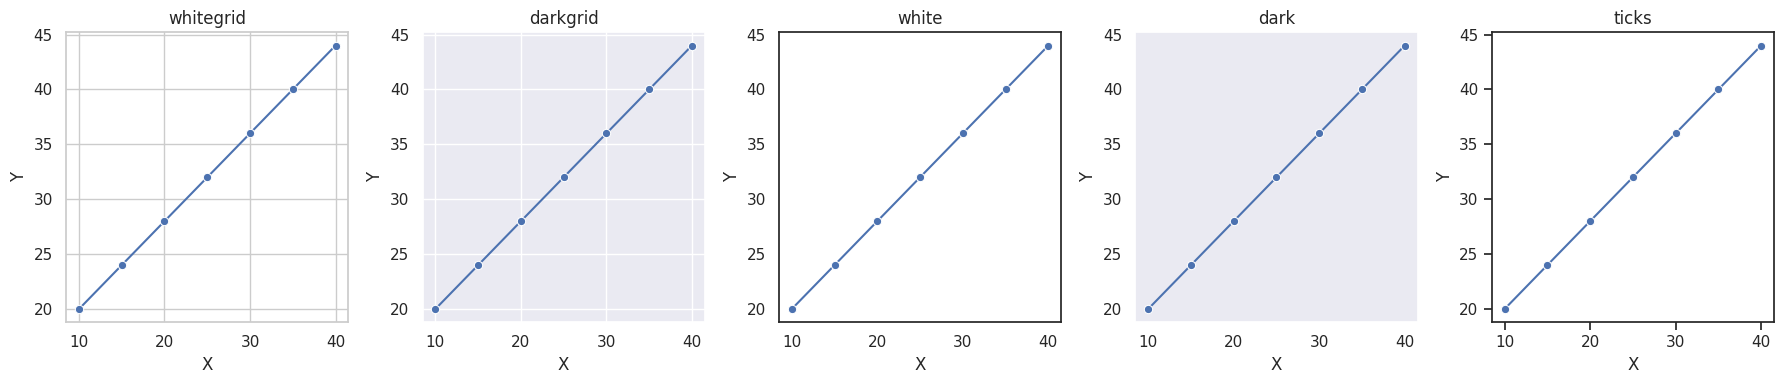

In [ ]:
# Lista de estilos disponíveis
styles = ["whitegrid", "darkgrid", "white", "dark", "ticks"]

# Cria a figura vazia
fig = plt.figure(figsize=(18, 4))

for i, style in enumerate(styles, start=1):
    sns.set_theme(style=style)
    ax = fig.add_subplot(1, len(styles), i)
    sns.lineplot(data=df, x="X", y="Y", marker="o", ax=ax)
    ax.set_title(style)

plt.tight_layout() #Ajusta espaçamentos
plt.show() #O plt.show() do Matplotlib serve apenas para exibir na tela o que já foi desenhado.

O padrão do Seaborn é o darkgrid. Isso significa que se você não chamar sns.set_theme() ou sns.set_style(), o Seaborn automaticamente já aplica esse estilo.mas veja quando o caso dos outros templates

| Estilo        | Descrição                                                                   | Uso ideal                                                                          | Visual                                                                |
| ------------- | --------------------------------------------------------------------------- | ---------------------------------------------------------------------------------- | --------------------------------------------------------------------- |
| **whitegrid** | Fundo branco com linhas de grade claras no plano de fundo.                  | Estilo limpo, mas com linhas de referência para facilitar leitura de valores.      | Minimalista e técnico, muito usado em artigos e apresentações.        |
| **darkgrid**  | Fundo cinza escuro com linhas de grade bem visíveis.                        | Destacar linhas/pontos claros; ótimo para dashboards e visualização em telas.      | Contraste mais forte, confortável para leitura prolongada no monitor. |
| **white**     | Fundo branco liso, sem linhas de grade.                                     | Quando se deseja remover distrações e destacar apenas os elementos do gráfico.     | Limpo e simples, comum em publicações impressas.                      |
| **dark**      | Fundo cinza escuro liso, sem linhas de grade.                               | Ideal para gráficos com cores vivas e apresentações em projetores ou telas.        | Sofisticado, foco total nos elementos coloridos.                      |
| **ticks**     | Fundo branco liso com marcações (ticks) nos eixos, mas sem linhas de grade. | Boa escolha para visualizações minimalistas que ainda exigem referência nos eixos. | Técnica e enxuta, destacando apenas os eixos.                         |


# 🧱 Anatomia básica de um gráfico

No Seaborn, normalmente a estrutura é dada pela função com seus parâmetros.

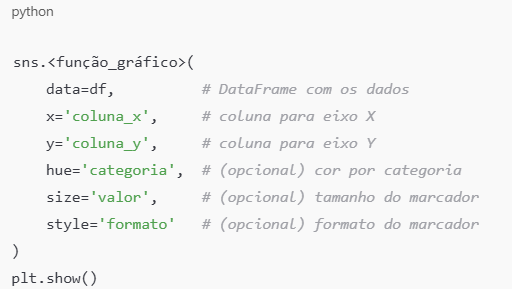

| Elemento    | Função                                                              | Observações                                                     |
| ----------- | ------------------------------------------------------------------- | --------------------------------------------------------------- |
| **`data`**  | Diz ao Seaborn onde buscar as variáveis (normalmente um DataFrame). | Se passar `data=None`, pode informar arrays/series diretamente. |
| **`x`**     | Define o que vai no eixo X.                                         | Pode ser nome de coluna (`'coluna_x'`) ou um array.             |
| **`y`**     | Define o que vai no eixo Y.                                         | Igual ao `x`, pode ser coluna ou array.                         |
| **`hue`**   | Cria subgrupos visuais por cor.                                     | Muito usado para comparar categorias.                           |
| **`size`**  | Varia o tamanho dos marcadores de acordo com uma variável.          | Mais comum em `scatterplot`.                                    |
| **`style`** | Muda o formato do marcador com base numa categoria.                 | Ex.: círculos, quadrados, triângulos.                           |


Dessa forma, o Seaborn gera o gráfico com base nesses mapeamentos. Ele retorna um objeto Axes do Matplotlib, que você pode armazenar em ax. Qualquer ajuste que não seja parte desses parâmetros (ex.: título, limites, ticks, rótulos de valores) é feito no ax usando métodos do Matplotlib, previamente comentados.

In [ ]:
#Exemplo:

df = pd.DataFrame({
    'categoria': ['A', 'B', 'C', 'A', 'B', 'C'],
    'valor': [10, 15, 7, 12, 18, 9],
    'grupo': ['G1', 'G1', 'G1', 'G2', 'G2', 'G2']
})

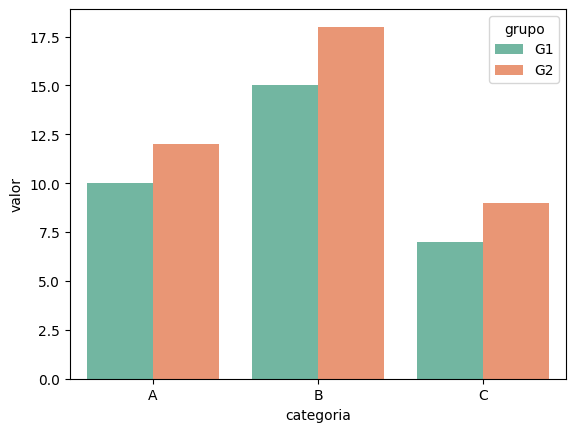

In [ ]:
sns.barplot(
    data=df,
    x='categoria',
    y='valor',
    hue='grupo',
    palette='Set2',
)

plt.show()



> Quando você chama uma função do Seaborn (ex.: sns.barplot()), por padrão ele cria o eixo automaticamente dentro da figura atual do Matplotlib. Nesse caso, você não precisa declarar ax, pois o Seaborn usa o eixo ativo e o Matplotlib gerencia tudo internamente. Os comandos como plt.title() ou plt.xlabel() atuam no eixo ativo criado pelo Seaborn.





# 📊 Processo de geração de gráficos com Seaborn

A Seaborn oferece uma ampla gama de tipos de gráficos que podem ser usados para visualização de dados e análise exploratória de dados. Para facilitar didaticamente é interessante seguir alguns passos para definição de plotagem.

### 1️⃣ Escolher o tipo de análise (quantidade de variáveis)

**Quantas variáveis quero visualizar ao mesmo tempo?**

* Univariada – somente x (contém apenas um eixo de informação)
* Bivariada – x e y (contém dois eixos de informação)
* Trivariada – x, y, z (contém três eixos de informação)

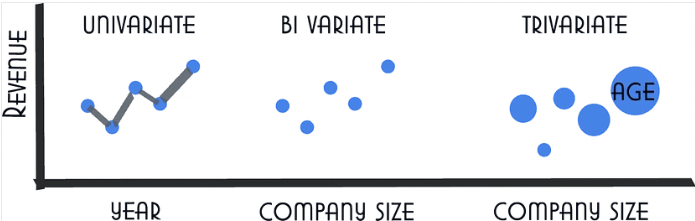

#### Exemplo Univariado

In [ ]:
# Dados sintéticos
df_uni = pd.DataFrame({
    'idade': np.random.randint(18, 80, size=100)
})

In [ ]:
df_uni.head(5)

,idade
0,31
1,20
2,18
3,22
4,43


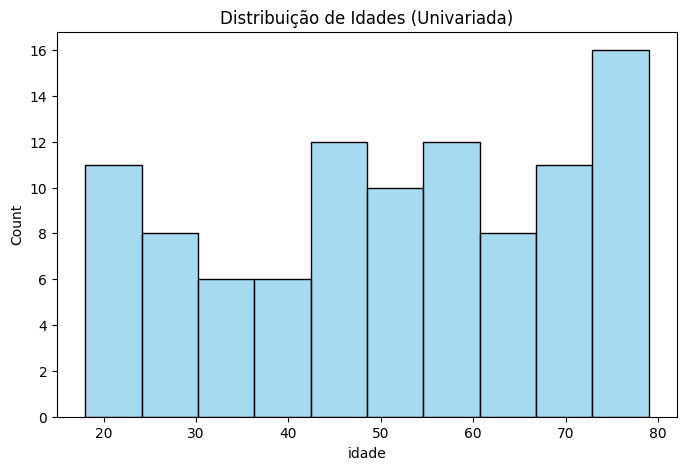

In [ ]:
# Exemplo: Univariada
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_uni, x='idade', bins=10, color='skyblue')
ax.set_title("Distribuição de Idades (Univariada)")
plt.show()

#### Exemplo Bivariado

In [ ]:
# Dados sintéticos
df_bi = pd.DataFrame({
    'escolaridade': np.random.choice(['Fundamental', 'Médio', 'Superior'], size=100),
    'salario': np.random.randint(1500, 8000, size=100)
})

In [ ]:
df_bi.head(5)

,escolaridade,salario
0,Superior,6411
1,Fundamental,5487
2,Fundamental,3027
3,Fundamental,7515
4,Fundamental,7011


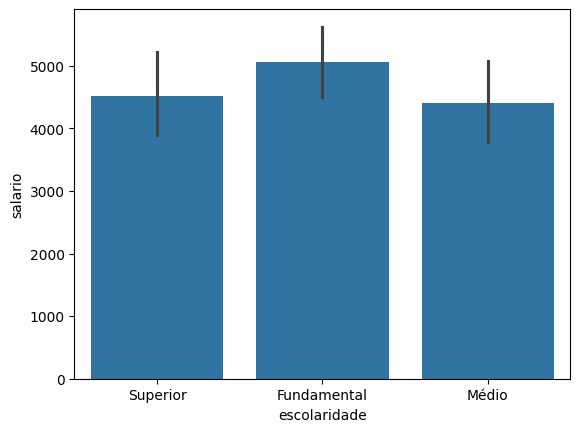

In [ ]:
# Exemplo: Bivariada
sns.barplot(data=df_bi, x='escolaridade', y='salario')
ax.set_title("Salário Médio por Escolaridade (Bivariada)")
plt.show()

#### Exemplo Trivariado

In [ ]:
# Dados sintéticos
df_tri = pd.DataFrame({
    'produto': np.random.choice(['Eletrônico', 'Roupas', 'Alimento'], size=100),
    'consumo': np.random.randint(50, 500, size=100),
    'regiao': np.random.choice(['Norte', 'Sul', 'Leste', 'Oeste'], size=100)
})

In [ ]:
df_tri.head(5)

,produto,consumo,regiao
0,Roupas,59,Oeste
1,Roupas,295,Norte
2,Alimento,374,Sul
3,Alimento,149,Norte
4,Alimento,339,Leste


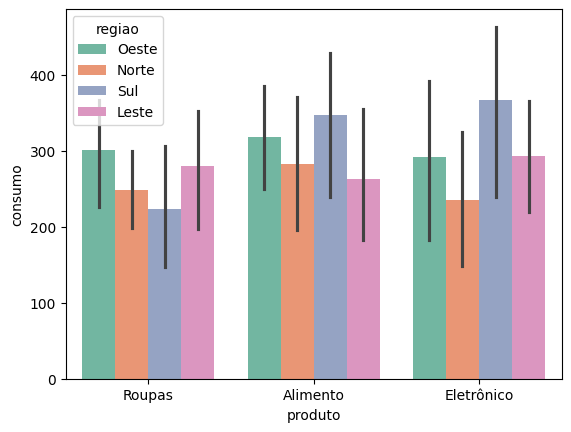

In [ ]:
# Exemplo: Trivariada
sns.barplot(data=df_tri, x='produto', y='consumo', hue='regiao', palette='Set2')
ax.set_title("Consumo por Produto e Região (Trivariada)")
plt.show()

### 2️⃣ Escolher a família do gráfico

**Quero mostrar relação, distribuição ou comparação entre categorias?**

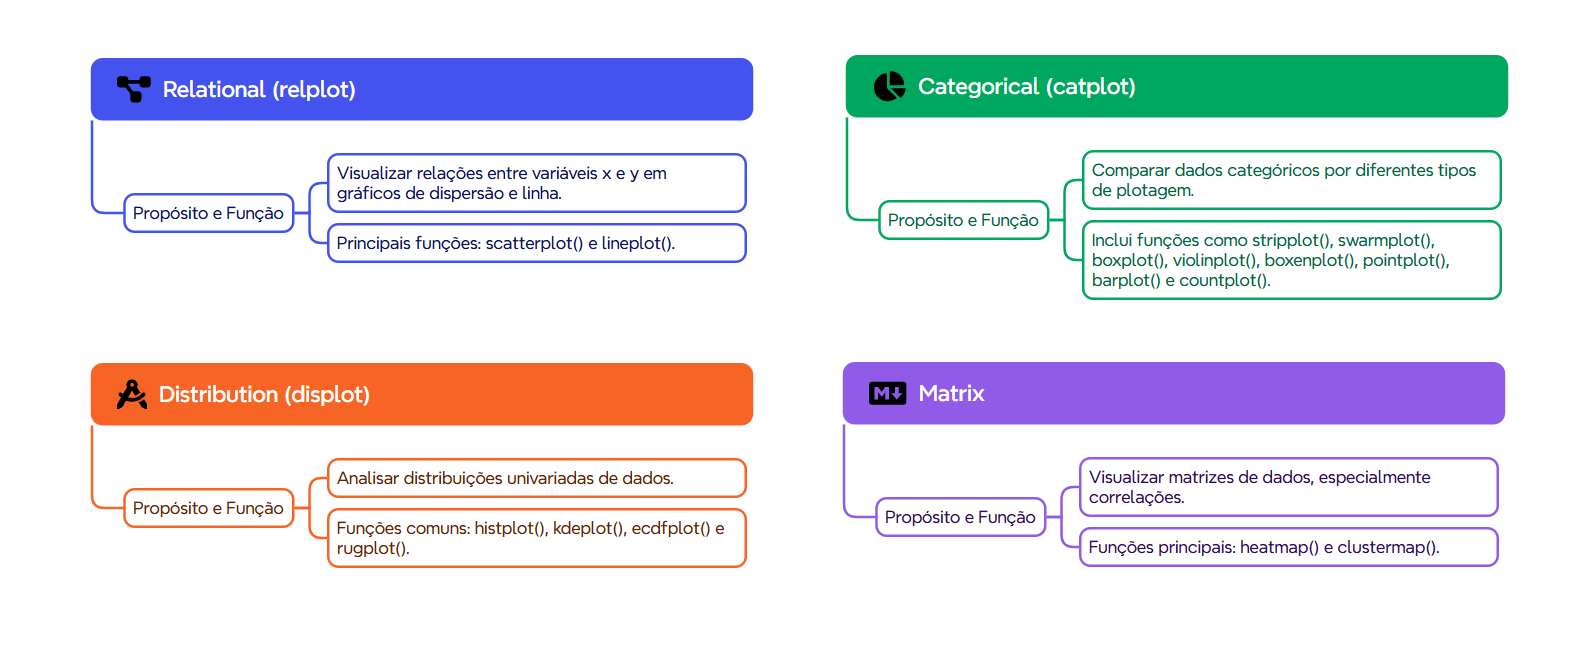



> Veja que o Seaborn não inclui nativamente alguns tipos de gráficos mais “populares” como pizza (pie chart). Isso acontece porque ele foi projetado para focar em estatísticas descritivas e visualização exploratória.



#### Categóricos

#####🟤 Barplot

In [ ]:
# Criando dados de exemplo
np.random.seed(42)
produtos = ["Produto A", "Produto B", "Produto C", "Produto D"]
lojas = ["Loja 1", "Loja 2"]

df_bar = pd.DataFrame({
    "produto": np.random.choice(produtos, 50),
    "loja": np.random.choice(lojas, 50),
    "vendas": np.random.randint(20, 100, 50)
})

In [ ]:
# soma total de vendas por produto
df_total = df_bar.groupby("produto", as_index=False)["vendas"].sum()

In [ ]:
df_total.head(5)

,produto,vendas
0,Produto A,608
1,Produto B,639
2,Produto C,836
3,Produto D,869


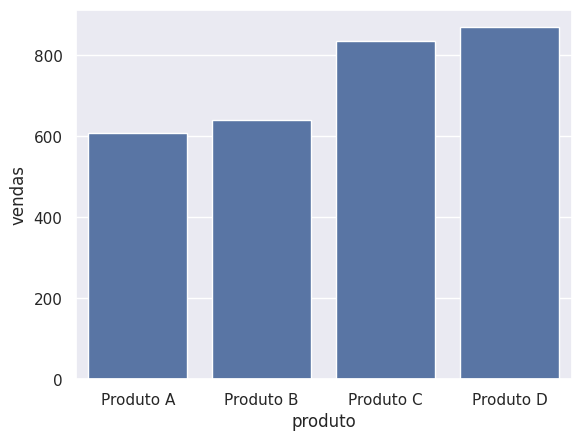

In [ ]:
sns.barplot(data=df_total, x="produto", y="vendas")
ax.set_title("Boxplot — Notas por Curso e Turno", fontsize=14)
plt.show()

#####🟤 Barplot agrupado

In [ ]:
# Criando dados de exemplo
np.random.seed(42)
produtos = ["Produto A", "Produto B", "Produto C", "Produto D"]
lojas = ["Loja 1", "Loja 2"]

df_bar = pd.DataFrame({
    "produto": np.random.choice(produtos, 50),
    "loja": np.random.choice(lojas, 50),
    "vendas": np.random.randint(20, 100, 50)
})


In [ ]:
df_bar.head(5)

,produto,loja,vendas
0,Produto C,Loja 1,82
1,Produto D,Loja 2,37
2,Produto A,Loja 1,63
3,Produto C,Loja 2,53
4,Produto C,Loja 1,93


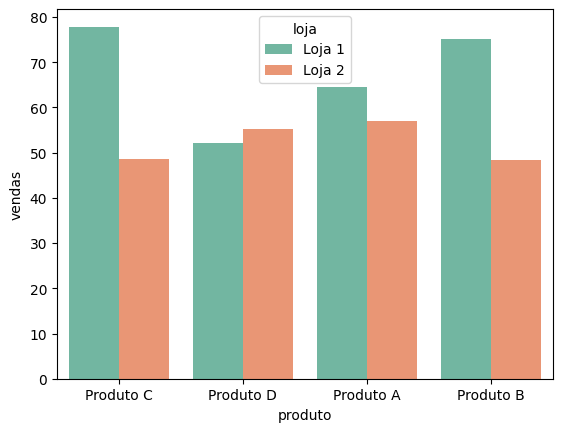

In [ ]:
sns.barplot(data=df_bar, x="produto", y="vendas", errorbar = None, hue="loja", palette="Set2")
ax.set_title("Boxplot — Notas por Curso e Turno", fontsize=14)
plt.show()

#####🟤 Barplot horizontalizado

Basta trocar o eixo usando orient="h" no sns.barplot() ou inverter x e y.

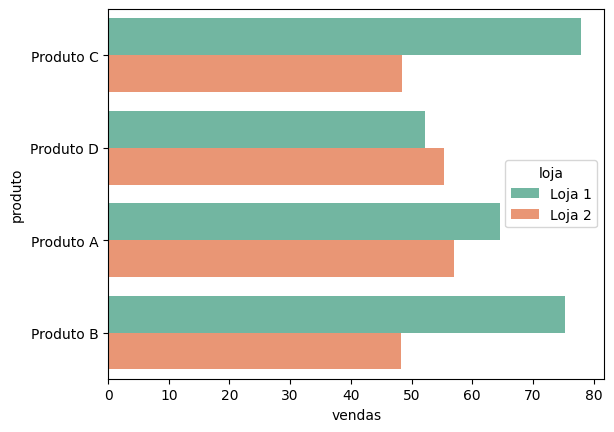

In [ ]:
sns.barplot(data=df_bar, y="produto", x="vendas", errorbar = None, hue="loja", palette="Set2")
ax.set_title("Boxplot — Notas por Curso e Turno", fontsize=14)
plt.show()

#####🟤 Barplot proporcionado

Precisamos calcular a proporção de cada loja dentro de cada produto.

In [ ]:
# Criar tabela de proporções corrigida
df_prop = (
    df_bar.groupby(["produto", "loja"], as_index=False)["vendas"]
    .sum()
)

In [ ]:
# Calcular proporção dentro de cada produto
df_prop["proporcao"] = df_prop.groupby("produto")["vendas"].transform(lambda x: 100 * x / x.sum())

In [ ]:
df_prop

,produto,loja,vendas,proporcao
0,Produto A,Loja 1,323,53.125000
1,Produto A,Loja 2,285,46.875000
2,Produto B,Loja 1,301,47.104851
3,Produto B,Loja 2,338,52.895149
4,Produto C,Loja 1,545,65.191388
5,Produto C,Loja 2,291,34.808612
6,Produto D,Loja 1,261,30.034522
7,Produto D,Loja 2,608,69.965478


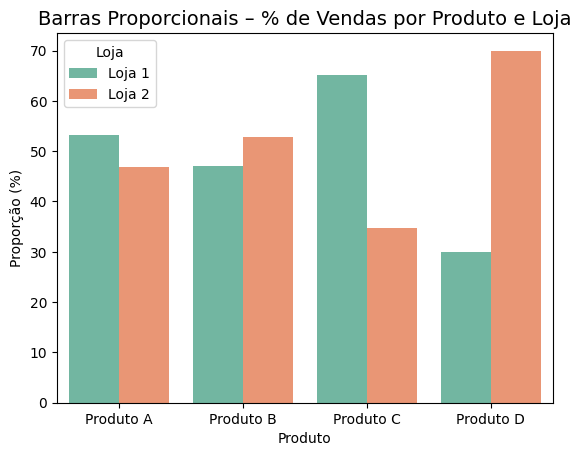

In [ ]:
sns.barplot(
    data=df_prop,
    x="produto",
    y="proporcao",
    hue="loja",
    palette="Set2"
)

plt.title("Barras Proporcionais – % de Vendas por Produto e Loja", fontsize=14)
plt.ylabel("Proporção (%)")
plt.xlabel("Produto")
plt.legend(title="Loja")
plt.show()

#####🟤 Barplot empilhado

Quando você usa sns.barplot() ou sns.histplot() com hue=, ele sempre desenha barras agrupadas lado a lado, não empilhadas.

Isso acontece porque o objetivo do Seaborn é mais comparar valores de categorias separadamente. Mas é possível fazer isso com o Matplotlib, através do parâmetro stacked bars.

In [ ]:
# Criar tabela pivotada para empilhamento
pivot_prop = df_prop.pivot(index="produto", columns="loja", values="vendas")

In [ ]:
pivot_prop

loja,Loja 1,Loja 2
produto,,
Produto A,323,285
Produto B,301,338
Produto C,545,291
Produto D,261,608


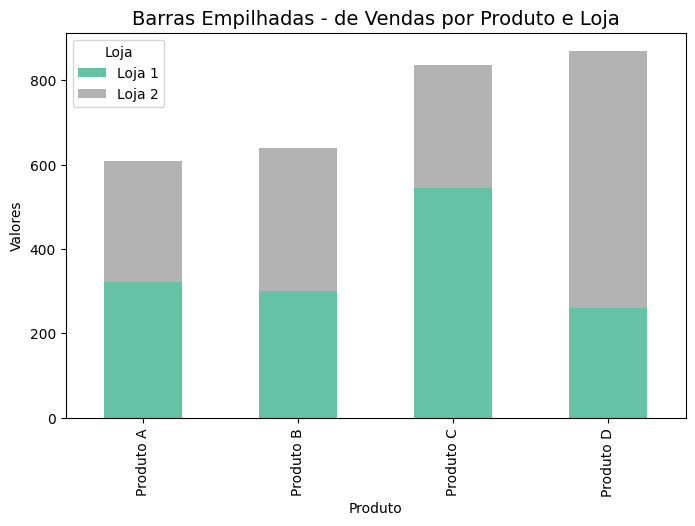

In [ ]:
# Plotar barras empilhadas
pivot_prop.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Set2")

# Ajustes de rótulos e título
plt.ylabel("Valores")
plt.xlabel("Produto")
plt.title("Barras Empilhadas - de Vendas por Produto e Loja", fontsize=14)
plt.legend(title="Loja")
plt.show()

#####🟤 Barplot empilhado proporcionado

Quando você usa sns.barplot() ou sns.histplot() com hue=, ele sempre desenha barras agrupadas lado a lado, não empilhadas.

Isso acontece porque o objetivo do Seaborn é mais comparar valores de categorias separadamente. Mas é possível fazer isso com o Matplotlib, através do parâmetro stacked bars.

In [ ]:
# Criar tabela pivotada para empilhamento
pivot_prop = df_prop.pivot(index="produto", columns="loja", values="proporcao")

In [ ]:
pivot_prop

loja,Loja 1,Loja 2
produto,,
Produto A,53.125000,46.875000
Produto B,47.104851,52.895149
Produto C,65.191388,34.808612
Produto D,30.034522,69.965478


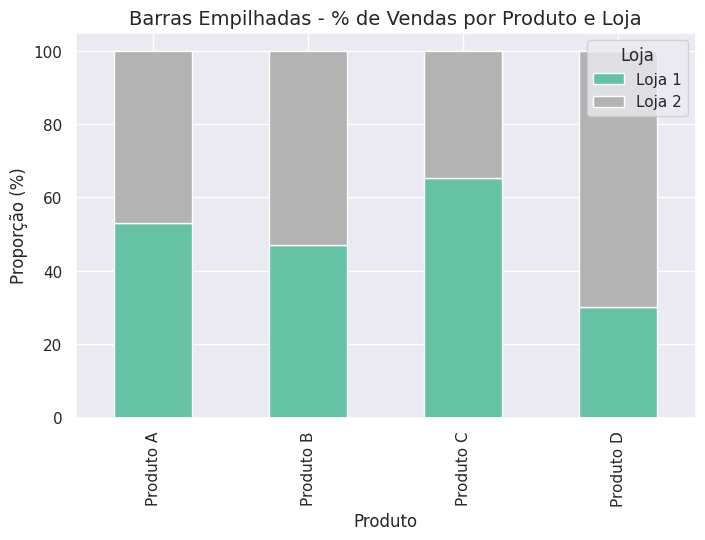

In [ ]:
# Plotar barras empilhadas
pivot_prop.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Set2")

# Ajustes de rótulos e título
plt.ylabel("Proporção (%)")
plt.xlabel("Produto")
plt.title("Barras Empilhadas - % de Vendas por Produto e Loja", fontsize=14)
plt.legend(title="Loja")
plt.show()

####Relacionais

#####🔵 Scatterplot

In [ ]:
# Reprodutibilidade
np.random.seed(42)

# Gerando dados numéricos
x = np.random.uniform(0, 100, 100)         # variável numérica 1
y = 0.5 * x + np.random.normal(0, 10, 100) # variável numérica 2 com ruído
grupo = np.random.choice(['G1', 'G2'], 100)

df_scatter = pd.DataFrame({'idade': x, 'renda': y, 'grupo': grupo})

In [ ]:
df_scatter.head(5)

,idade,renda,grupo
0,37.454012,19.597477,G2
1,95.071431,44.545642,G1
2,73.199394,37.517305,G2
3,59.865848,10.057235,G1
4,15.601864,5.604213,G2


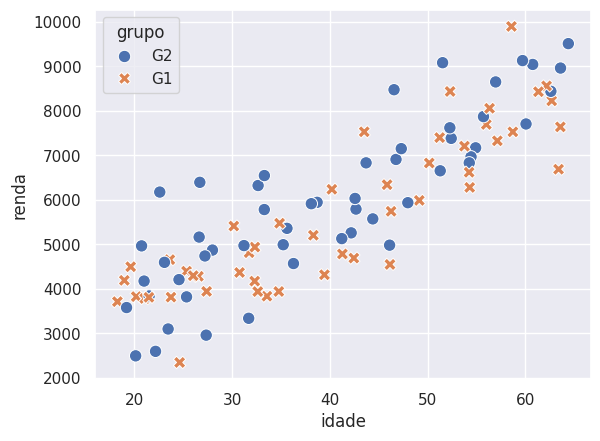

In [ ]:
# Exemplo:
sns.scatterplot(data=df_scatter, x='idade', y='renda', hue='grupo', style='grupo', s=80)
ax.set_title("Scatterplot — Relação entre Idade e Renda", fontsize=14)
plt.show()

##### 🟢 Lineplot

In [ ]:
# Dados
datas = pd.date_range(start="2023-01-01", periods=12, freq="ME")
vendas = np.random.randint(200, 500, size=12)
loja = np.random.choice(['Loja A', 'Loja B'], 12)

df_line = pd.DataFrame({'data': datas, 'vendas': vendas, 'loja': loja})

In [ ]:
df_line.head(5)

,data,vendas,loja
0,2023-01-31,252,Loja B
1,2023-02-28,259,Loja A
2,2023-03-31,307,Loja A
3,2023-04-30,204,Loja B
4,2023-05-31,302,Loja A


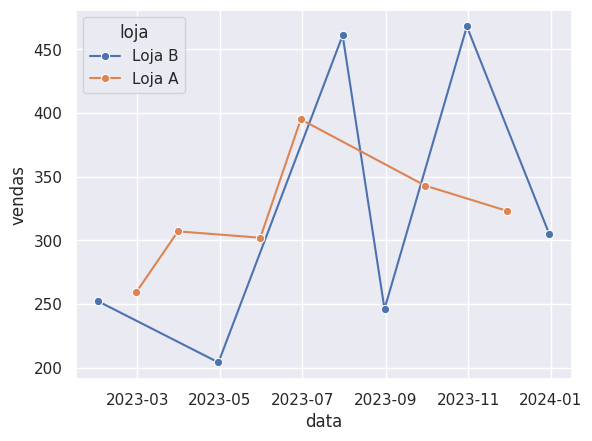

In [ ]:
# Exemplo:
sns.lineplot(data=df_line, x='data', y='vendas', hue='loja', marker='o')
ax.set_title("Lineplot — Vendas Mensais por Loja", fontsize=14)
plt.show()

####Distributivos

#####🟡 Histplot

In [ ]:
# Dados
df_hist = pd.DataFrame({'altura': np.random.normal(170, 10, 200)})

In [ ]:
df_hist.head(5)

,altura
0,173.195376
1,171.932781
2,185.961429
3,176.010539
4,163.557248


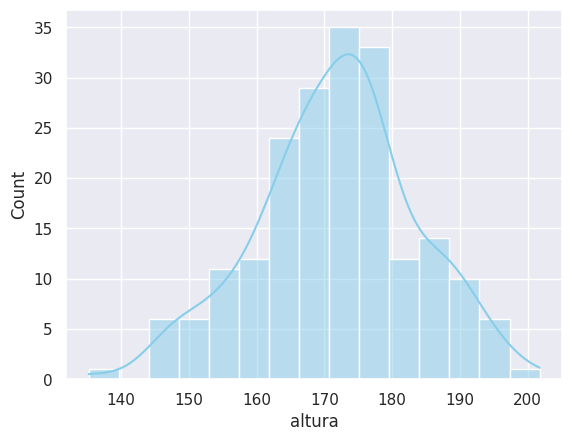

In [ ]:
sns.histplot(data=df_hist, x='altura', bins=15, color='skyblue', kde=True)
ax.set_title("Histograma — Distribuição de Alturas", fontsize=14)
plt.show()

##### 🟠 Boxplot

In [ ]:
# Dados
df_box = pd.DataFrame({
    'curso': np.random.choice(['Engenharia', 'Medicina', 'Direito'], 90),
    'nota': np.random.normal(7, 1, 90),
    'turno': np.random.choice(['Manhã', 'Noite'], 90)
})

In [ ]:
df_box.head(5)

,curso,nota,turno
0,Engenharia,5.844484,Manhã
1,Medicina,8.570111,Noite
2,Direito,5.875048,Noite
3,Direito,8.281920,Noite
4,Engenharia,6.971579,Noite


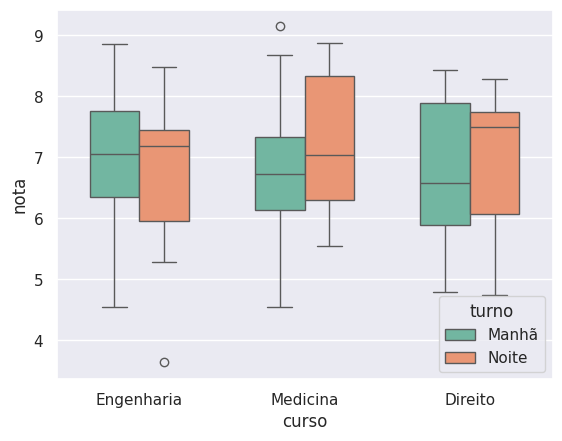

In [ ]:
sns.boxplot(data=df_box, x='curso', y='nota', hue='turno', palette='Set2',  width=0.6)
ax.set_title("Boxplot — Notas por Curso e Turno", fontsize=14)
plt.show()

####Matriciais

##### ⚪ Heatmap

In [ ]:
# Exemplo de dados
df = pd.DataFrame({
    "produto": ["Produto A", "Produto B", "Produto C", "Produto D"] * 2,
    "loja": ["Loja 1"]*4 + ["Loja 2"]*4,
    "vendas": [323, 301, 545, 261, 285, 338, 291, 608]
})

# Criar tabela pivot para o heatmap
tabela = df.pivot(index="produto", columns="loja", values="vendas")

In [ ]:
tabela.head(5)

loja,Loja 1,Loja 2
produto,,
Produto A,323,285
Produto B,301,338
Produto C,545,291
Produto D,261,608


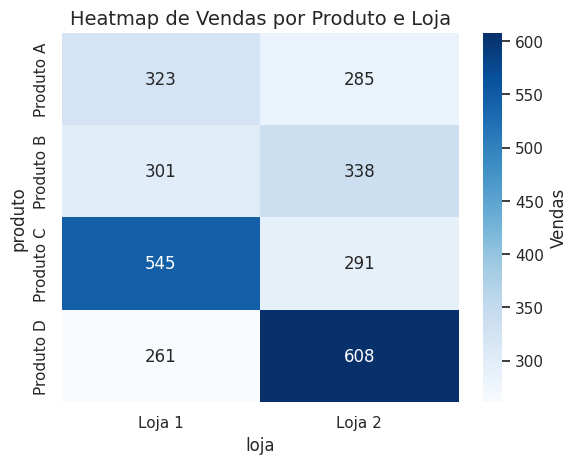

In [ ]:
# Criar heatmap
sns.heatmap(
    tabela,
    annot=True,           # mostra valores
    fmt=".0f",             # formato dos números (sem casas decimais)
    cmap="Blues",         # paleta de cores quando é contínuo
    cbar_kws={'label': 'Vendas'}  # legenda da barra
)

plt.title("Heatmap de Vendas por Produto e Loja", fontsize=14)
plt.show()

### 3️⃣ Definir o nível de geração do gráfico

**Quero um gráfico ou múltiplos gráficos (inclusive comparativos)?**

* No Matplotlib: Tudo gira em torno de Figure e Axes. Como vimos, você sempre cria uma Figure e dentro dela um ou mais Axes e plota diretamente nesses eixos.
* No Seaborn: Ele mantém as funções “comportamento Matplotlib” (Axes-level), mas também criou um segundo tipo de função que encapsula a criação de figuras e eixos múltiplos — as Figure-level. As Figure-level retornam um objeto especial chamado FacetGrid ou PairGrid que gerencia múltiplos Axes automaticamente.

#### Axes-level → gráfico único

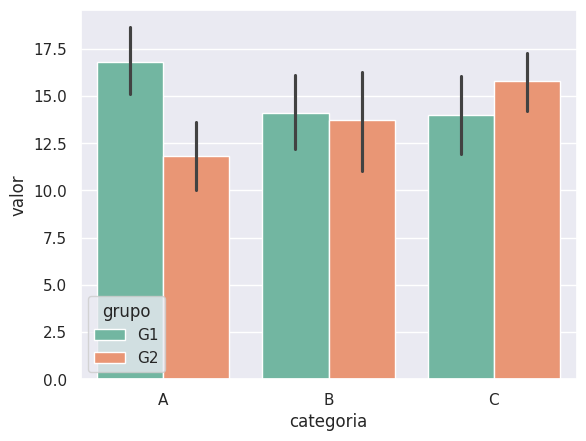

In [ ]:
# Criar figure e axis manualmente
sns.barplot(data=df, x='categoria', y='valor', hue='grupo', palette='Set2')

# Personalização via Matplotlib
ax.set_title("Axes-level: Um gráfico único")
plt.show()

#### Figure-level → grade automática de facetas

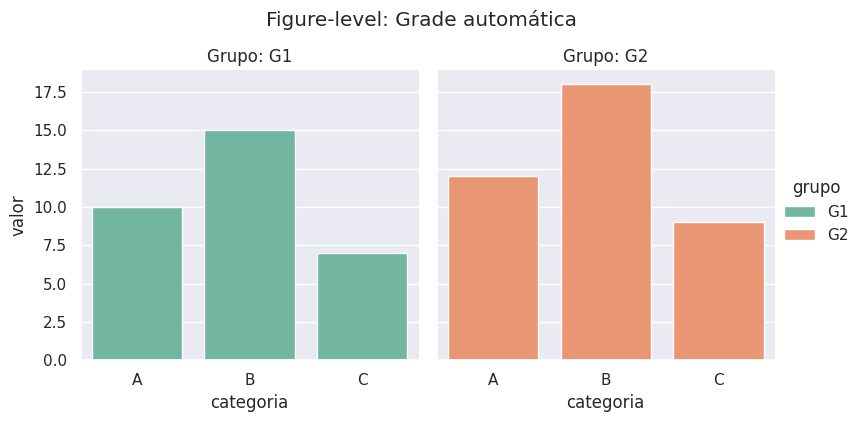

In [ ]:
# Figure-level (usa catplot)
ax = sns.catplot(data=df, x='categoria', y='valor', hue='grupo',
                col='grupo', kind='bar', palette='Set2', height=4)

# Personalização no FacetGrid
ax.set_titles("Grupo: {col_name}")
ax.fig.suptitle("Figure-level: Grade automática", y=1.05)
plt.show()

> Quando você usa Figure-level no Seaborn, como catplot, relplot ou displot, você não precisa (e nem deve) criar fig, ax = plt.subplots() antes, porque: 1. Essas funções sempre criam uma nova figura do zero. 2. O tamanho da figura é controlado dentro da própria função, usando o parâmetro height (altura de cada subplot) e aspect (razão largura/altura)






> Figure-level é como um subplot facilitado, porque ele já monta automaticamente uma grade (row=, col=, hue=) sem precisar gerenciar plt.subplots() manualmente.



### 4️⃣ Mapear variáveis

**Quais variáveis quero utilizar?**

Defina qual coluna do seu DataFrame vai para cada elemento visual básico do gráfico Seaborn.

* data → DataFrame.
* x, y → mapeamentos dos eixos.
* hue → cor por grupo (contínuo ou categórico).
* palette → paleta (ex.: 'Set2', lista de cores, dict).
* order, hue_order → ordem das categorias.
* legend, legend_out → controle da legenda (onde suportado).

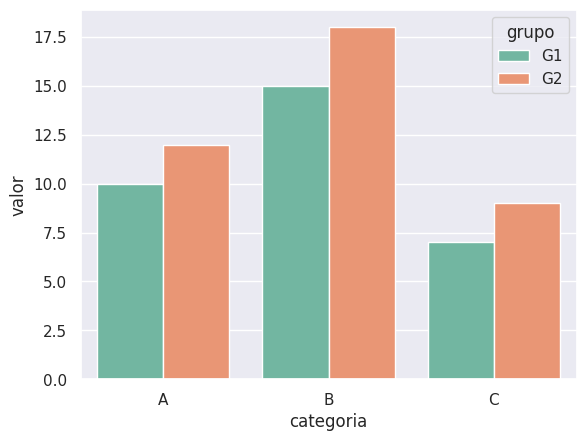

In [ ]:
sns.barplot(
    data=df,
    x='categoria',
    y='valor',
    hue='grupo',
    palette='Set2',
)

plt.show()

*Exemplo de aplicação de Paletas*

#### 🎨 Paletas Contínuas (degradê)

Usadas para valores ordenados.
* viridis, plasma, inferno, magma, cividis — perceptualmente uniformes.
* rocket, mako, flare, crest — modernas e suaves.

In [ ]:
# Criar dados fictícios
np.random.seed(42)
x = np.random.rand(300)
y = x * 8 + np.random.randn(300) * 2
valor = y  # variável contínua para o degradê

df = pd.DataFrame({
    "X": x,
    "Y": y,
    "Valor": valor
})

In [ ]:
df.head(5)

,X,Y,Valor
0,0.374540,3.087465,3.087465
1,0.950714,6.302514,6.302514
2,0.731994,10.143840,10.143840
3,0.598658,6.057106,6.057106
4,0.156019,-2.802136,-2.802136


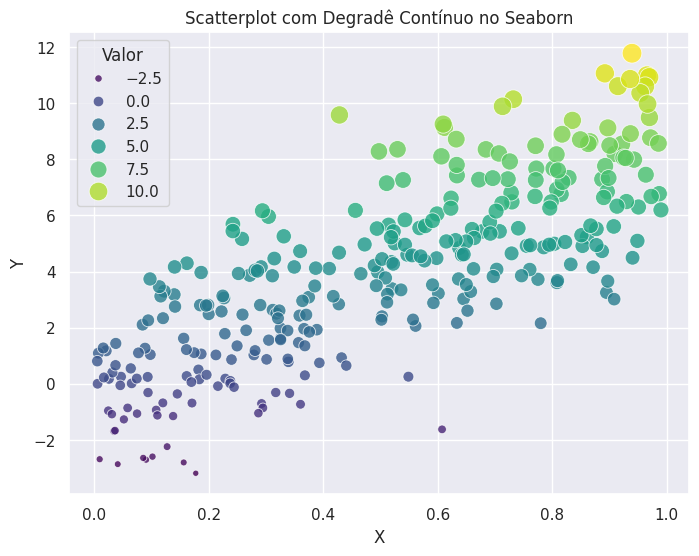

In [ ]:
# Scatterplot com degradê contínuo no Seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="X",
    y="Y",
    hue="Valor",        # variável contínua
    palette="viridis",  # colormap contínuo
    size="Valor",       # opcional: muda tamanho
    sizes=(20, 200),    # range de tamanhos
    alpha=0.8,
    edgecolor="white"
)

plt.title("Scatterplot com Degradê Contínuo no Seaborn")
plt.show()

#### 🎨 Paletas Categóricas (cores distintas)

Usadas para classes sem ordem.
* deep (default), muted, pastel, dark, bright, colorblind.

In [ ]:
# Criar dados fictícios
np.random.seed(42)
categorias = ["Produto A", "Produto B", "Produto C", "Produto D"]
regioes = ["Norte", "Sul", "Leste", "Oeste"]

dados = []
for cat in categorias:
    for reg in regioes:
        valor = np.random.randint(50, 500)
        dados.append([cat, reg, valor])

df = pd.DataFrame(dados, columns=["Produto", "Região", "Vendas"])

In [ ]:
df.head(5)

,Produto,Região,Vendas
0,Produto A,Norte,152
1,Produto A,Sul,485
2,Produto A,Leste,398
3,Produto A,Oeste,320
4,Produto B,Norte,156


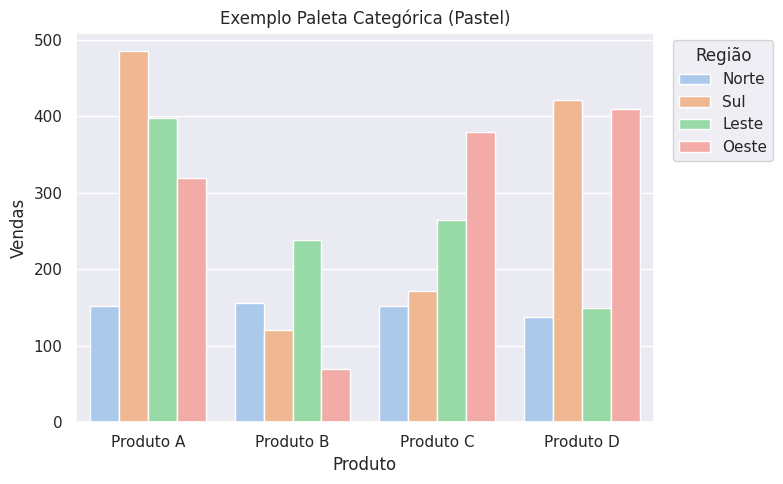

In [ ]:
# Escolher paleta categórica
pal = sns.color_palette("pastel", n_colors=len(regioes))

# Criar gráfico
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="Produto",
    y="Vendas",
    hue="Região",
    palette=pal
)
plt.title("Exemplo Paleta Categórica (Pastel)")
plt.legend(title="Região", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### 🎨 Paletas ColorBrewer

Usadas para dados sequenciais, divergentes ou categóricos.

* Divergentes: coolwarm, RdBu, Spectral (para valores ordenados que têm um ponto central relevante, como zero)
* Categóricas: Set1, Set2, Paired.
* Sequenciais: Blues, Greens, Reds.

In [ ]:
# Criar dados fictícios contínuos
np.random.seed(0)
areas = ["Mkt", "Vendas", "Ops", "Fin", "TI", "RH", "Jurídico", "Comercial", "Engenharia", "Logística"]
variacao = np.random.randint(-25, 26, size=len(areas))

df = pd.DataFrame({
    "area": areas,
    "variacao": variacao
})


In [ ]:
df.head(5)

,area,variacao
0,Mkt,19
1,Vendas,22
2,Ops,-25
3,Fin,-22
4,TI,-22


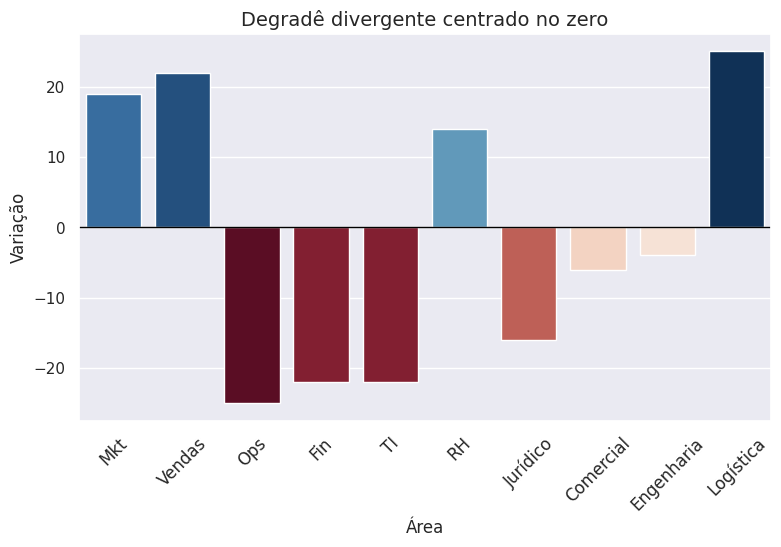

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="area", # Coluna que define as categorias no eixo X
    y="variacao", # Coluna com valores numéricos (eixo Y)
    palette="RdBu", # Paleta divergente
    hue="variacao", # aplica a cor pelo valor
    dodge=False # Faz as barras ocuparem a largura inteira da categoria
)

plt.axhline(0, color="black", linewidth=1)
plt.title("Degradê divergente centrado no zero", fontsize=14)
plt.ylabel("Variação")
plt.xlabel("Área")
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.tick_params(axis='x', rotation=45, labelsize=12)  # Rotaciona rótulos do eixo X em 45°
plt.show()

OBS: Entendendo as cores

### 5️⃣ Aplicar estética específica do Seaborn de acordo com o tipo gráfico

Ajuste a aparência diretamente nos parâmetros do Seaborn. Abaixo os principais parâmetros do Seaborn para cada tipo de gráfico:

#### 🟤 Barplot

* estimator → função agregadora (ex.: np.mean, np.median).
* errorbar → "sd", "se", "ci", ("pi", 95) ou função; None para remover.
* n_boot → amostras bootstrap (para IC).
* capsize → chapéu nas barras de erro.
* dodge → barras lado a lado por hue (True) ou sobrepostas (False).
* width → largura das barras.
* saturation → intensidade da cor das barras.
* orient='h'|'v' → orientação.

####🔵 Scatterplot

* style / style_order → formato do marcador por categoria.
* size / sizes / size_norm → tamanho do marcador.
* hue_norm → normalização da cor (dados contínuos).
* alpha → transparência.
* marker → marcador padrão (se não usar style).
* edgecolor, linewidth → contorno do marcador.
* s → tamanho fixo (se não usar size).
* x_jitter, y_jitter (versões recentes) → ruído para separar pontos sobrepostos.

#### 🟢 Lineplot

* estimator → agregador quando há várias observações por x (padrão = média).
* errorbar → "sd", "se", "ci", ("pi", 95) ou função (substitui ci).
* n_boot → amostras bootstrap para erro (quando aplicável).
* units + estimator=None → uma linha por série (não agrega).
* markers, dashes / style → estilo/forma por grupo.
* sort → ordena por x antes de traçar (padrão True).
* linewidth → espessura da linha.
* alpha → transparência.
* drawstyle → modo de conexões ('default', 'steps-post' etc.).

#### 🟡 Histplot

* bins, binwidth, binrange → controle dos bins.
* discrete=True → trata x como valores discretos.
* stat → 'count', 'frequency', 'probability', 'percent', 'density'.
* multiple → 'layer', 'dodge', 'stack', 'fill' (com hue).
* element → 'bars', 'step', 'poly'.
* common_bins, common_norm → bins/normalização compartilhados entre grupos.
* cumulative=True → CDF acumulada.
* kde=True → curva de densidade sobre o histograma.
* fill=True → preencher (para element='step' ou kde).
* shrink → reduz largura das barras para espaçamento com hue.

#### 🟠 Boxplot

* orient='h'|'v' → orientação.
* width → largura de cada box.
* dodge → separa por hue.
* whis → extensão do “bigode” (ex.: 1.5, [5, 95]).
* showfliers → mostra/oculta outliers.
* linewidth, saturation → espessura/“saturação” da cor.
* order, hue_order → ordenar categorias.
* notch=True (em algumas versões) → entalhe de mediana.

#### ⚪ Heatmap

* cmap → colormap. Sequencial (ex.: "YlGnBu") p/ 0→alto. Divergente (ex.: "RdBu", "coolwarm") p/ desvios em torno de um centro → use center=0. Inverso com _r (ex.: "YlGnBu_r").
* vmin, vmax, center → fixam a faixa de cor; crucial para comparar múltiplos heatmaps.
* annot=True, fmt=".1f" → escreve os valores nas células.
* linewidths, linecolor → linhas divisórias (melhora leitura).
* cbar, cbar_kws → barra de cor e rótulo (ex.: {'label':'Vendas'}).
* mask → matriz booleana do mesmo shape para ocultar células.
* square=True → células quadradas; bom para correlação.
* robust=True → ignora outliers ao definir vmin/vmax (usa percentis 2 e 98).

### 6️⃣ Finalizar com Matplotlib

Para implementar customizações adicionais, utilizar funções e parâmetros do próprio Matplotlib, discutido previamente.

# 📊 Gráficos combinados

O sns.jointplot() é meio que o “canivete suíço” do Seaborn para visualizar relações bivariadas junto com as distribuições marginais de cada variável.

Ele cria três gráficos ao mesmo tempo:
* Dispersão ou similar no centro (relação x vs y).
* Histograma/KDE no topo (distribuição de x).
* Histograma/KDE à direita (distribuição de y).

In [ ]:
# Criar um DataFrame de exemplo
np.random.seed(42)
df = pd.DataFrame({
    "vendas": np.random.randint(50, 500, 100),
    "proporcao": np.random.rand(100) * 100,
    "categoria": np.random.choice(["A", "B"], size=100)
})

In [ ]:
df.head(5)

,vendas,proporcao,categoria
0,152,38.867729,B
1,485,27.134903,A
2,398,82.873751,B
3,320,35.675333,B
4,156,28.093451,B


Text(0.5, 1.02, 'Jointplot - Scatter')

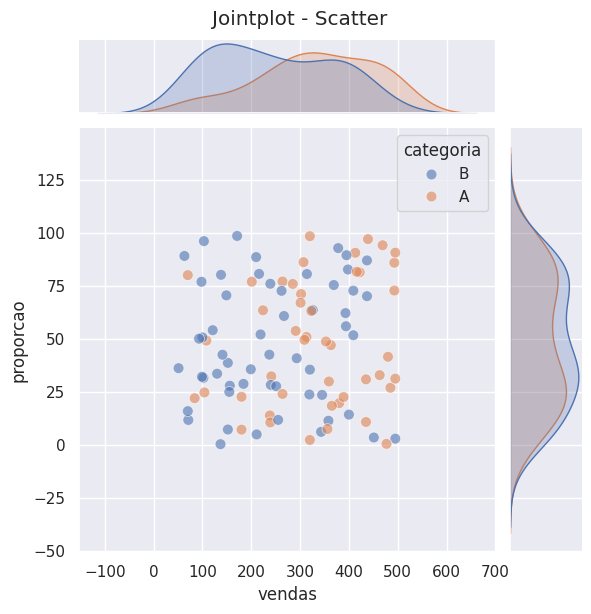

In [ ]:
# Scatter com hue
sns.jointplot(data=df, x="vendas", y="proporcao",
              kind="scatter", hue="categoria",
              joint_kws=dict(s=60, alpha=0.6))
plt.suptitle("Jointplot - Scatter", y=1.02)


# 🔚 Código final para customização

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



> O Seaborn já vem com estilos prontos (whitegrid, darkgrid, etc.). A maior parte das customizações (linhas de referência, setas, áreas) ainda é feita com funções do Matplotlib (ax.axhline, ax.annotate, etc.). A lógica para adicionar rótulos sobre os pontos é idêntica.

In [ ]:
def plot_exemplo_unico_linha_seaborn(df):
    """
    Gera um gráfico de linha usando Seaborn com:
    - Títulos e rótulos de eixos
    - Grid
    - Anotação com seta
    - Linhas de referência
    - Área sombreada
    - Rótulos de valores sobre os pontos
    """

    # ========================
    # 1. Configuração de estilo do Seaborn
    # ========================
    sns.set_theme(style="whitegrid")  # fundo com grid leve
    plt.figure(figsize=(8, 5))

    # ========================
    # 2. Criação do gráfico de linha
    # ========================
    ax = sns.lineplot(
        data=df,
        x="X",
        y="Y",
        marker='o',
        color='blue',
        label="Dados"
    )

    # ========================
    # 3. Títulos e rótulos
    # ========================
    ax.set_title("Título Principal", fontsize=14, fontweight='bold', pad=30)
    ax.set_xlabel("Eixo X", fontsize=12, labelpad=10)
    ax.set_ylabel("Eixo Y", fontsize=12, labelpad=10)

    # ========================
    # 4. Legenda
    # ========================
    ax.legend(
        loc='lower center',
        bbox_to_anchor=(0.90, 1),
        fontsize=10,
        title="Legenda"
    )

    # ========================
    # 5. Limites dos eixos
    # ========================
    ax.set_xlim(10, 40)
    ax.set_ylim(20, 45)

    # ========================
    # 6. Marcação e tamanho da fonte dos ticks
    # ========================
    ax.tick_params(axis='both', rotation=0, labelsize=12)

    # ========================
    # 7. Linhas de referência
    # ========================
    ax.axhline(y=32, color='red', linestyle=':', linewidth=1)
    ax.axvline(x=25, color='blue', linestyle='--', linewidth=1)

    # ========================
    # 8. Rótulos de valores sobre os pontos
    # ========================
    for x_val, y_val in zip(df["X"], df["Y"]):
        ax.text(
            x_val, y_val + 0.5, f"{y_val}",
            ha='center', va='bottom', fontsize=9, color='black'
        )

    # ========================
    # 9. Anotação com seta
    # ========================
    ax.annotate(
        "Importante",
        xy=(30, 36),  # ponto alvo
        xytext=(30, 42),  # posição do texto
        ha='center',
        arrowprops=dict(
            facecolor='black',
            arrowstyle='->',
            lw=1.5,
            linestyle='--'
        )
    )

    # ========================
    # 10. Área sombreada
    # ========================
    ax.axvspan(20, 30, color='yellow', alpha=0.3)

    # ========================
    # 11. Exibir o gráfico
    # ========================
    plt.show()

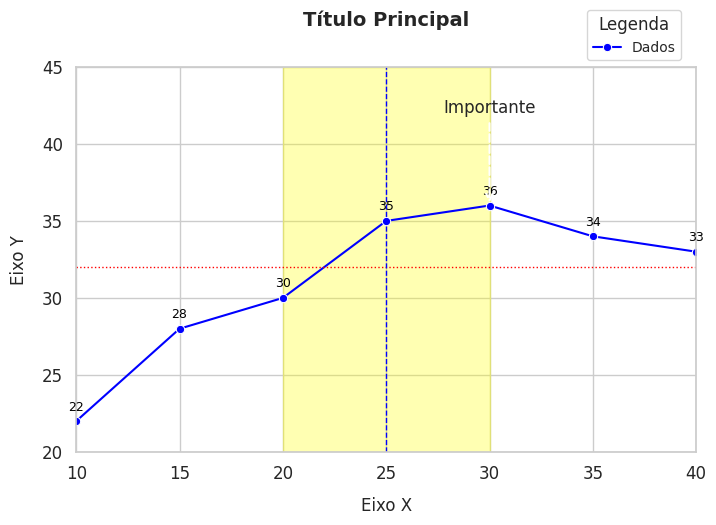

In [ ]:
# -------------------------
# Exemplo de uso
# -------------------------
df = pd.DataFrame({
    "X": [10, 15, 20, 25, 30, 35, 40],
    "Y": [22, 28, 30, 35, 36, 34, 33]
})

plot_exemplo_unico_linha_seaborn(df)